In [74]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

df = pd.read_csv('data/hotels.csv')
df.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [76]:
df['days_since_review'] = pd.to_timedelta(df['days_since_review'])
df['review_date'] = pd.to_datetime(df['review_date'])
df['lat'] = df['lat'].interpolate()
df['lng'] = df['lng'].interpolate()

In [77]:
data_negative_word = df['review_total_negative_word_counts'].value_counts().head(30)
data_negative_word.loc['other'] = df['review_total_negative_word_counts'].value_counts()[31:].sum()

data_positive_word = df['review_total_positive_word_counts'].value_counts().head(50)
data_positive_word.loc['other'] = df['review_total_positive_word_counts'].value_counts()[51:].sum()

data_reviews = df['total_number_of_reviews_reviewer_has_given'].value_counts().head(30)
data_reviews.loc['other'] = df['total_number_of_reviews_reviewer_has_given'].value_counts()[31:].sum()

C:\Users\User\AppData\Local\Temp\ipykernel_2332\1657325918.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=15)
C:\Users\User\AppData\Local\Temp\ipykernel_2332\1657325918.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['additional_number_of_scoring'], ax=axes[0, 2])
C:\Users\User\AppData\Local\Temp\ipykernel_2332\1657325918.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an

Text(0.5, 1.0, 'lng')

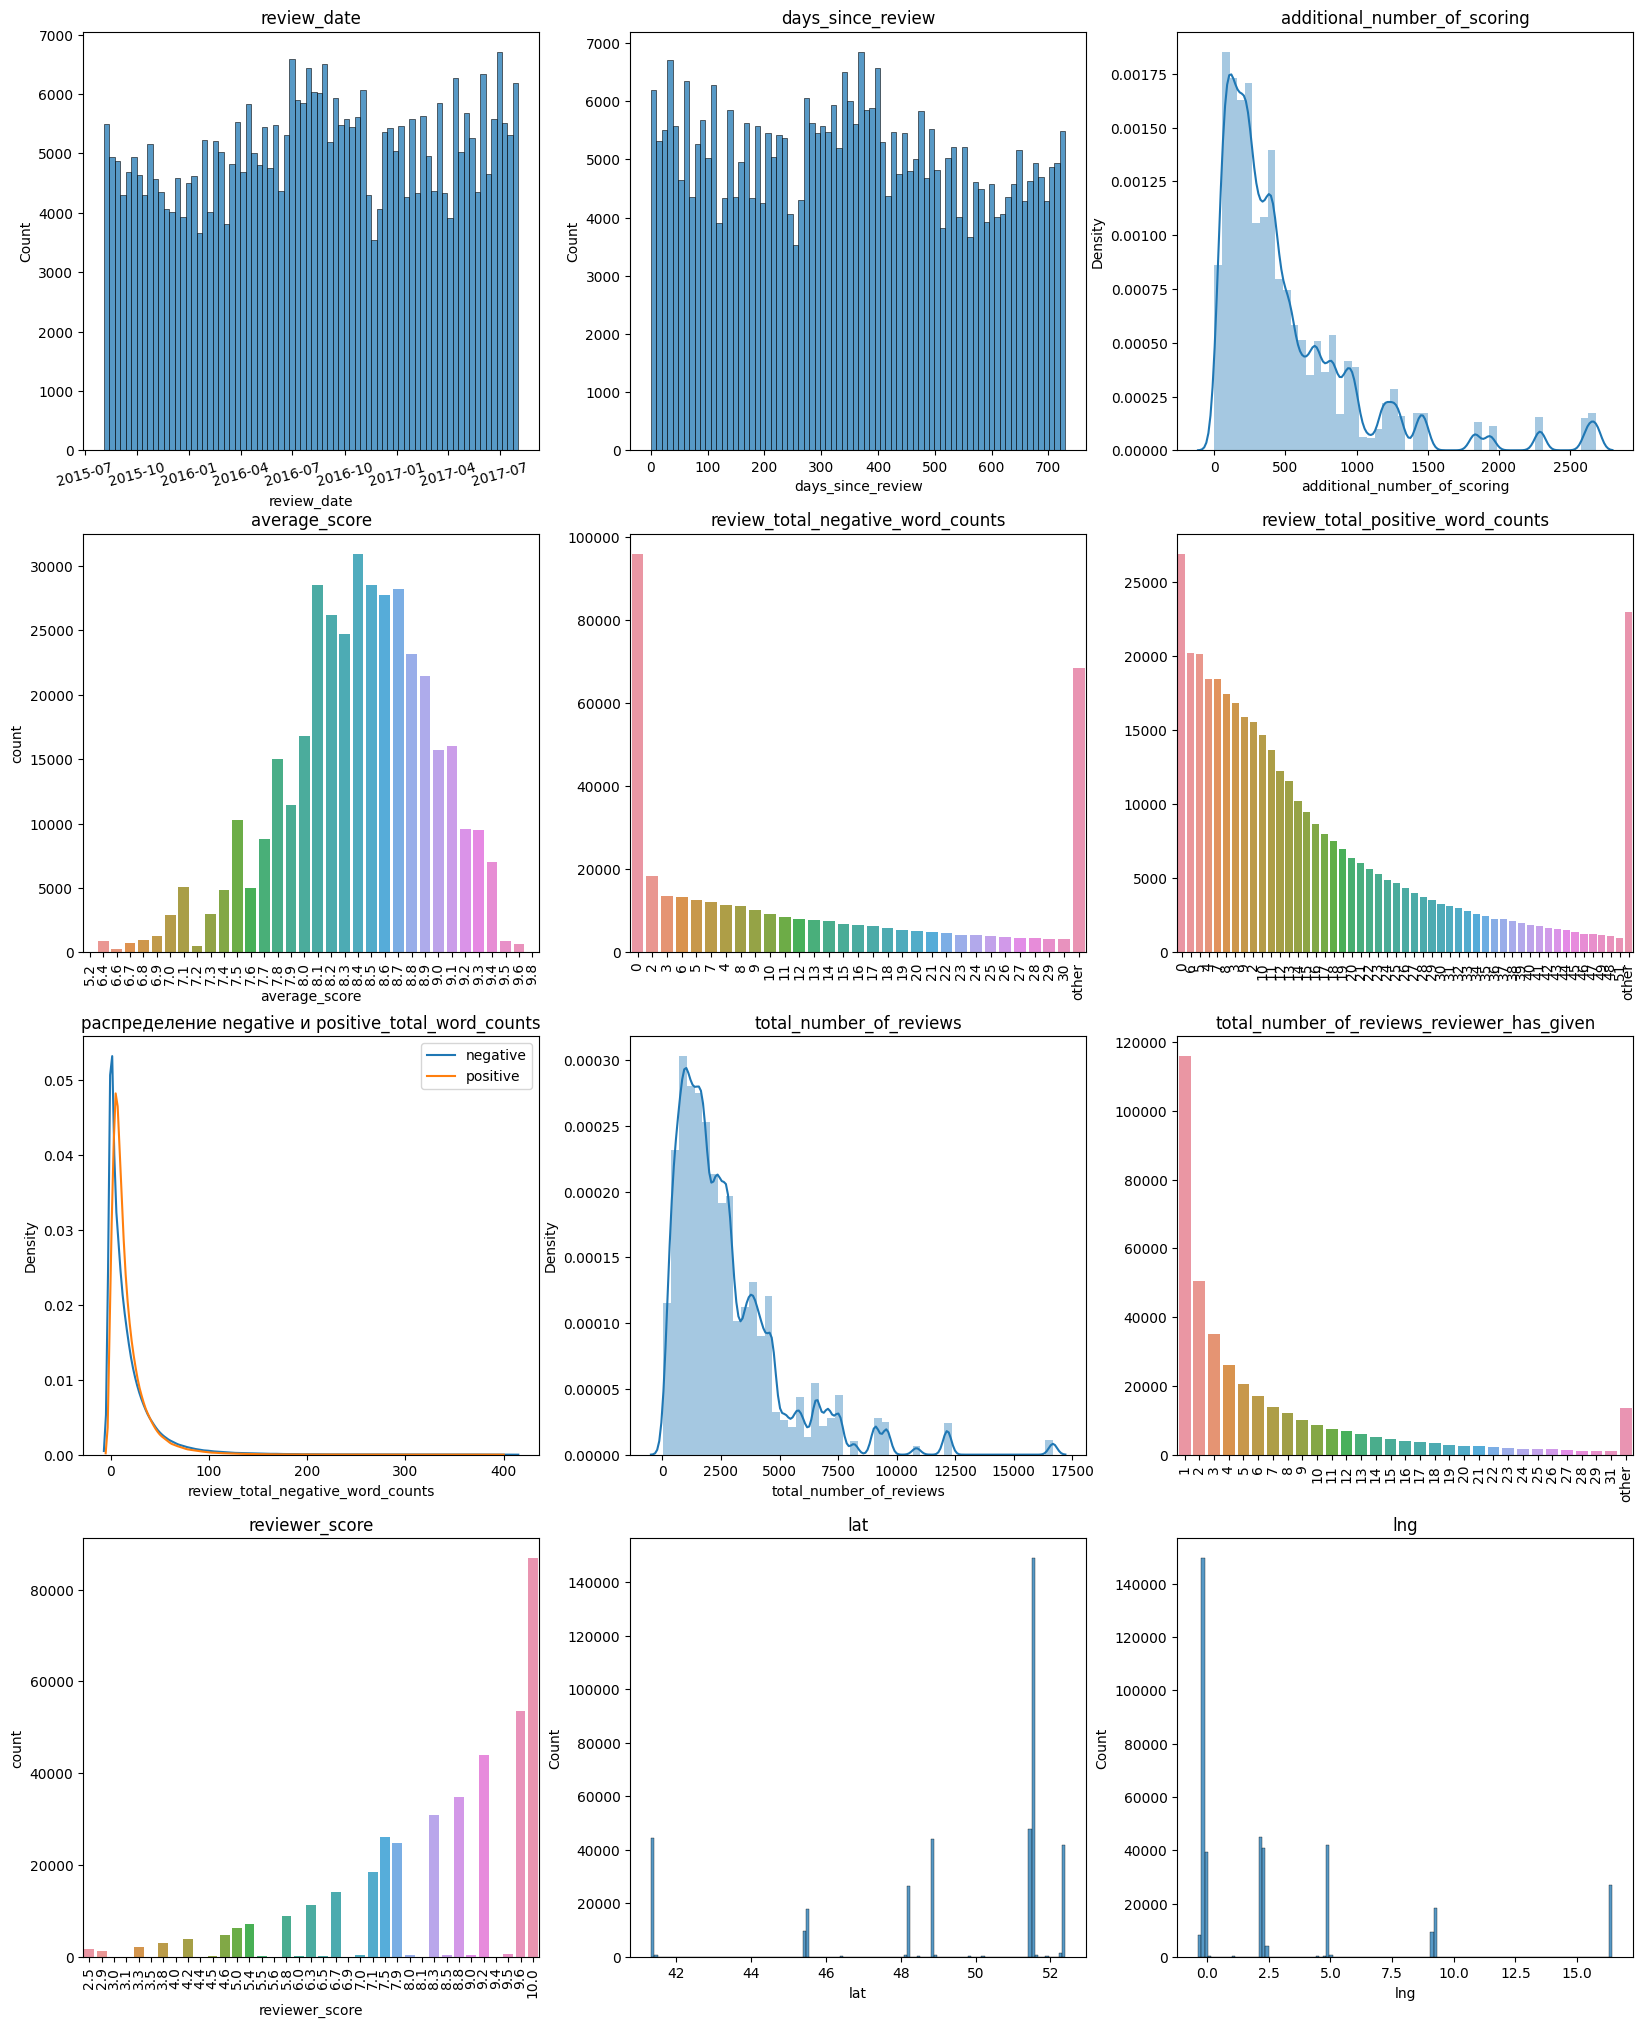

In [78]:
fig, axes = plt.subplots(4, 3, figsize=(20, 25))
# review_date
sns.histplot(df, x='review_date', ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=15)
axes[0, 0].set_title('review_date')
# days_since_review
sns.histplot(df['days_since_review'].dt.days, ax=axes[0, 1])
axes[0, 1].set_title('days_since_review')
# additional_number_of_scoring
sns.distplot(df['additional_number_of_scoring'], ax=axes[0, 2])
axes[0, 2].set_title('additional_number_of_scoring')
# average_score
sns.countplot(df, x='average_score', ax=axes[1, 0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)
axes[1, 0].set_title('average_score')
# review_total_negative_word_counts
sns.barplot(x=data_negative_word.index, y=data_negative_word.values, ax=axes[1, 1])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)
axes[1, 1].set_title('review_total_negative_word_counts')
# review_total_positive_word_counts
sns.barplot(x=data_positive_word.index, y=data_positive_word.values, ax=axes[1, 2])
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=90)
axes[1, 2].set_title('review_total_positive_word_counts')
# распределение negative и positive_total_word_counts
sns.kdeplot(df['review_total_negative_word_counts'], ax=axes[2, 0])
sns.kdeplot(df['review_total_positive_word_counts'], ax=axes[2, 0])
axes[2, 0].legend(['negative', 'positive'])
axes[2, 0].set_title('распределение negative и positive_total_word_counts')
# total_number_of_reviews
sns.distplot(df['total_number_of_reviews'], ax=axes[2, 1])
axes[2, 1].set_title('total_number_of_reviews')
# total_number_of_reviews_reviewer_has_given
sns.barplot(x=data_reviews.index, y=data_reviews.values, ax=axes[2, 2])
axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(), rotation=90)
axes[2, 2].set_title('total_number_of_reviews_reviewer_has_given')
# reviewer_score
sns.countplot(df, x='reviewer_score', ax=axes[3, 0])
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=90)
axes[3, 0].set_title('reviewer_score')
# lat
sns.histplot(df, x='lat', ax=axes[3, 1])
axes[3, 1].set_title('lat')
# lng
sns.histplot(df, x='lng', ax=axes[3, 2]);
axes[3, 2].set_title('lng')

45.49193293004498
48.61513121430595
51.66101580019777


<AxesSubplot: xlabel='lat', ylabel='Count'>

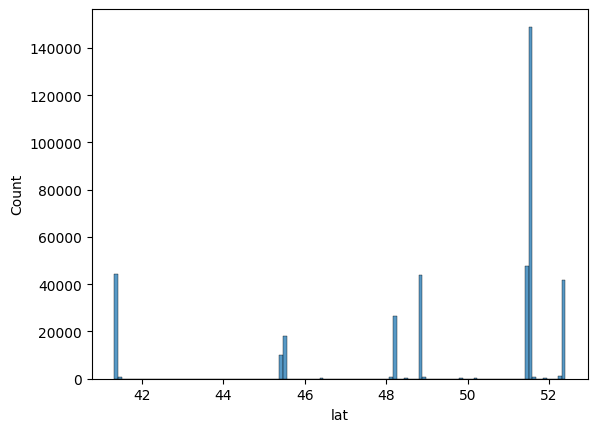

In [79]:
mask = df['lat'][df['lat'] <= 47]
print(mask[mask > 44].mean())
mask = df['lat'][df['lat'] <= 50]
print(mask[mask > 47].mean())
mask = df['lat'][df['lat'] > 50]
print(mask.mean())
sns.histplot(df, x='lat')

In [80]:
def get_lat(value):
    if value > 0 and value <= 44:
        return 41.388024
    if value > 44 and value <= 47:
        return 45.478805
    if value > 47 and value <= 50:
        return 48.850028
    if value > 50:
        return 51.513207

-0.13539237731846726
2.249869241714504
4.885720285160049
9.185186092683734
16.36335504478111


<AxesSubplot: xlabel='lng', ylabel='Count'>

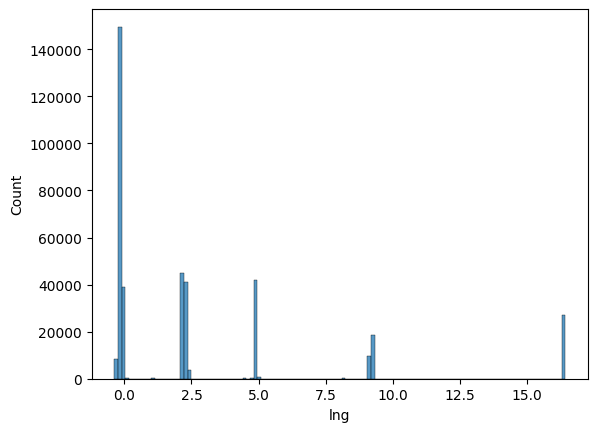

In [81]:
mask = df['lng'][df['lng'] <= 1.5]
print(mask.mean())
mask = df['lng'][df['lng'] <= 4]
print(mask[mask > 1.5].mean())
mask = df['lng'][df['lng'] <= 7]
print(mask[mask > 4].mean())
mask = df['lng'][df['lng'] <= 11]
print(mask[mask > 7].mean())
mask = df['lng'][df['lng'] > 11]
print(mask.mean())
sns.histplot(df, x='lng')

In [82]:
def get_lng(value):
    if value > - 2.5 and value <= 1.5:
        return -0.135392
    if value > 1.5 and value <= 4:
        return 2.249869
    if value > 4 and value <= 7:
        return 4.885720
    if value > 7 and value <= 11:
        return 9.185186
    if value > 11:
        return 16.363355

In [83]:
df['lat'] = df['lat'].apply(get_lat)
df['lng'] = df['lng'].apply(get_lng)

In [84]:
df['days_since_review'] = df['days_since_review'].dt.days
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month
df['review_day'] = df['review_date'].dt.day

In [85]:
def get_country(value):
    value_split = value.split()
    if value_split[-1] == 'Kingdom':
        return f'{value_split[-2]} {value_split[-1]}'
    else:
        return value_split[-1]
df['hotel_country'] = df['hotel_address'].apply(get_country)

In [86]:
def get_positive(value):
    if 'location' in value.lower():
        return 'location'
    elif 'staff' in value.lower():
        return 'staff'
    elif 'no ' in value.lower() or 'nothing' in value.lower() or 'not ' in value.lower(): 
        return 'nothing'
    elif 'bed' in value.lower():
        return 'bed'
    elif 'everything' in value.lower() or 'all' in value.lower():
        return 'everything'
    elif 'breakfast' in value.lower() or 'food' in value.lower():
        return 'food'
    elif 'clean' in value.lower():
        return 'clean'
    elif 'room' in value.lower():
        return 'room'
    elif 'great' == value.lower() or 'excellent' == value.lower():
        return 'great'
    elif 'price' in value.lower() or 'expensive' in value.lower() or 'cost' in value.lower():
        return 'price'
    else:
        return 'other'

In [87]:
df['positive'] = df['positive_review'].apply(get_positive)

In [88]:
def get_negative(value):
    if 'location' in value.lower():
        return 'location'
    elif 'no negative' in value.lower() or 'no complaints' in value.lower():
        return 'normal'
    elif 'staff' in value.lower():
        return 'staff'
    elif '' == value or 'nothing' in value.lower() or 'n a' in value.lower() or 'none' in value.lower() or 'na' == value.lower() or 'no ' in value.lower(): 
        return 'nothing'
    elif 'bed' in value.lower():
        return 'bed'
    elif 'everything' in value.lower() or 'all' in value.lower():
        return 'everything'
    elif 'breakfast' in value.lower() or 'food' in value.lower():
        return 'food'
    elif 'clean' in value.lower():
        return 'clean'
    elif 'room' in value.lower():
        return 'room'
    elif 'price' in value.lower() or 'expensive' in value.lower() or 'cost' in value.lower():
        return 'price'
    elif 'leav' in value.lower():
        return 'leaving'
    else:
        return 'other'

In [89]:
df['negative'] = df['negative_review'].apply(get_negative)

## Оценка значимости признаков для целевой переменной

In [90]:
data = df.copy()
# positive
ord_encoder = ce.OrdinalEncoder()
data_ord_pos = ord_encoder.fit_transform(df['positive'])
data = data.drop(data_ord_pos, axis=1)
data = pd.concat([data, data_ord_pos], axis=1)
# negative
data_ord_neg = ord_encoder.fit_transform(df['negative'])
data = data.drop(data_ord_neg, axis=1)
data = pd.concat([data, data_ord_neg], axis=1)
# reviewer_nationality
data_ord_neg = ord_encoder.fit_transform(df['reviewer_nationality'])
data = data.drop(data_ord_neg, axis=1)
data = pd.concat([data, data_ord_neg], axis=1)
# lat and lng
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
data_mm = mm_scaler.fit_transform(data[['lng', 'lat']])
data = data.drop(['lat', 'lng'], axis=1)
data['lat'] = pd.Series(data_mm[0:, 1])
data['lng'] = pd.Series(data_mm[0:, 0])
# hotel_name
data_ord_neg = ord_encoder.fit_transform(df['hotel_name'])
data = data.drop(data_ord_neg, axis=1)
data = pd.concat([data, data_ord_neg], axis=1)
# negative_ratio and positive_ratio
data['negative_ratio'] = data['review_total_negative_word_counts']/data['total_number_of_reviews_reviewer_has_given']
data['positive_ratio'] = data['review_total_positive_word_counts']/data['total_number_of_reviews_reviewer_has_given']
# tags
regex = "' (.*?) '"
tags = data['tags'].str.findall(regex)
column = {}
for tag in tags:
    for i in tag:
        column[i] = 0
for tag in tags:
    for i in tag:
        column[i] += 1
num = 0 
for i in column:
    num+=1
column = pd.Series(column)
values = list(column[column > 1000].index)
for i in values:
    data[i] = data['tags'].apply(lambda x: 1 if i in x else 0)

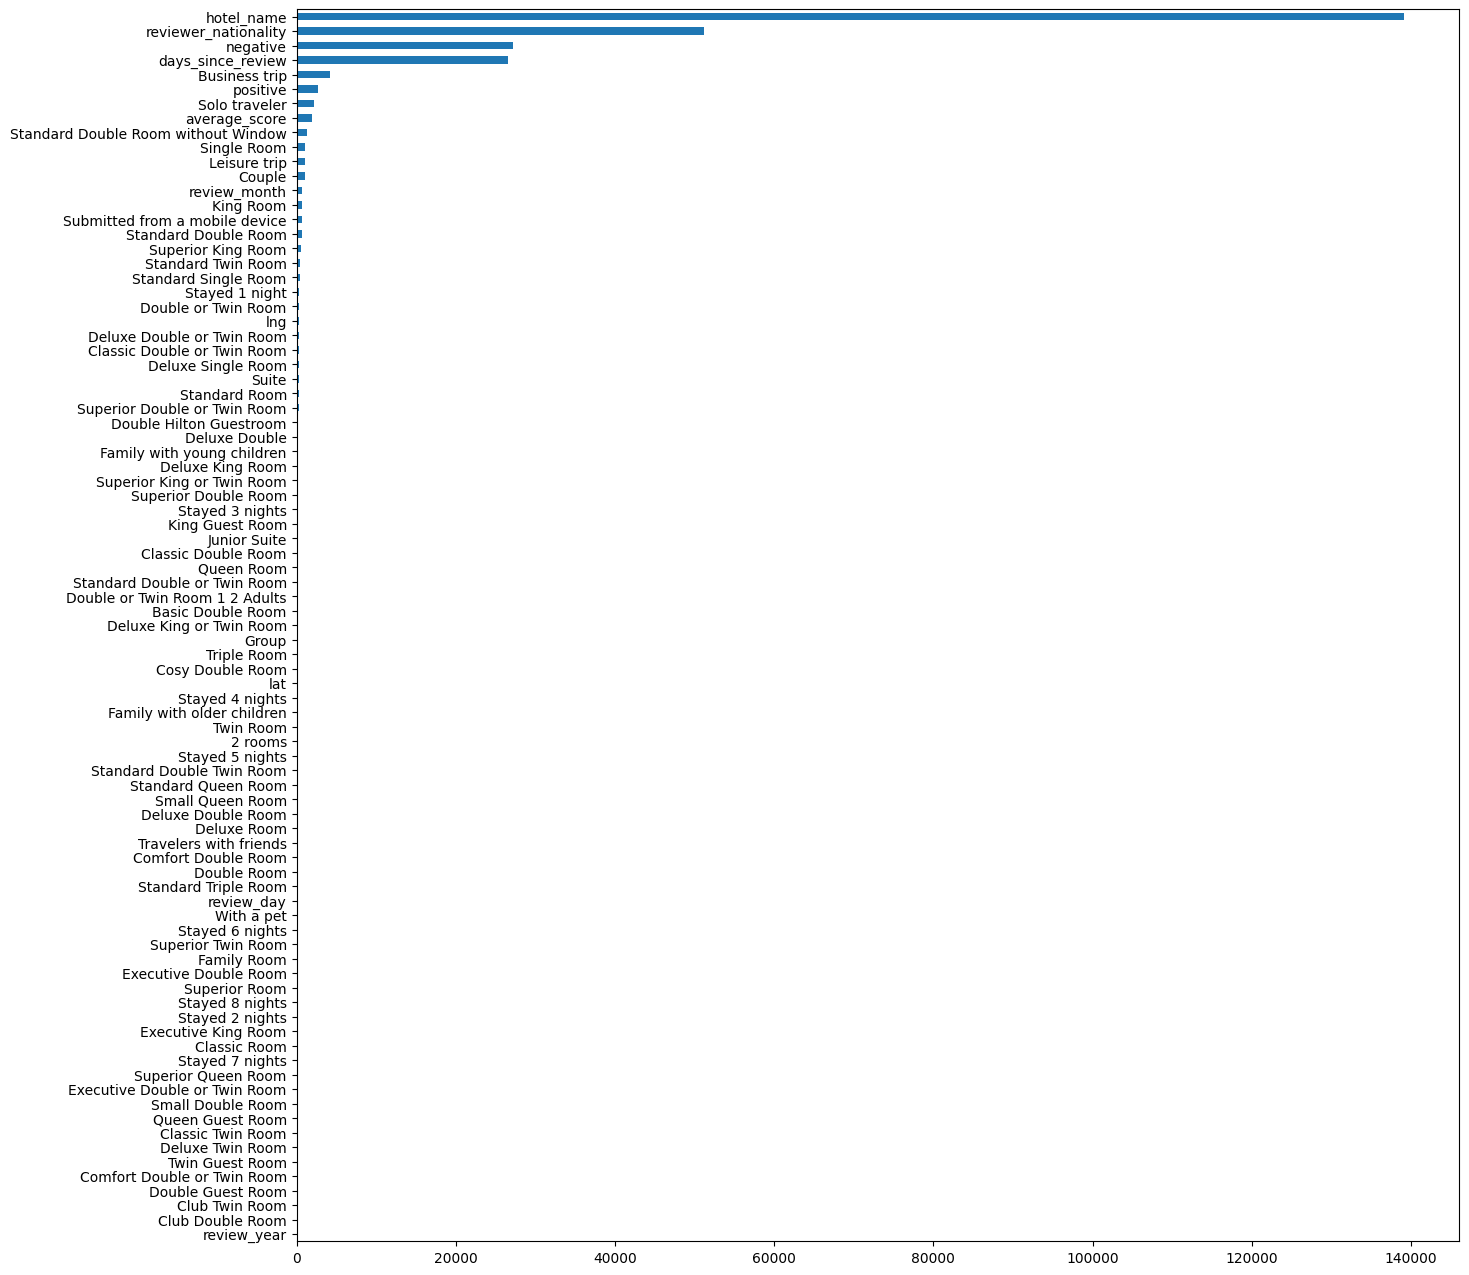

In [91]:

# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given',
            'negative_ratio', 'positive_ratio']

# категориальные признаки
cat_cols = ['average_score', 'lat', 'review_year', 'review_month', 'review_day', 'days_since_review', 'positive', 'negative', 'lng', 
            'reviewer_nationality', 'hotel_name']
    
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = data.drop(['reviewer_score'], axis = 1)  
y = data['reviewer_score'] 

y= y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

fig = plt.subplots(ncols=1, figsize=(15, 16))
imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_tags = pd.Series(chi2(X[values], y)[0], index=values)
sum_columns = pd.concat([imp_cat, imp_tags], axis=0)
sum_columns.sort_values(inplace = True)
sum_columns.plot(kind = 'barh');

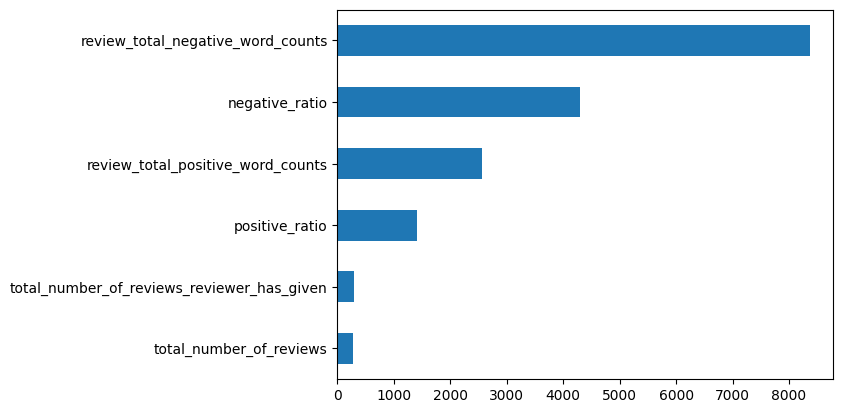

In [92]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh');

---

In [93]:
df['tags']

0         [' Leisure trip ', ' Couple ', ' Studio Suite ...
1         [' Business trip ', ' Couple ', ' Standard Dou...
2         [' Leisure trip ', ' Solo traveler ', ' Modern...
3         [' Leisure trip ', ' Solo traveler ', ' Standa...
4         [' Business trip ', ' Couple ', ' Standard Dou...
                                ...                        
386798    [' Leisure trip ', ' Group ', ' Club Double or...
386799    [' Leisure trip ', ' Couple ', ' Standard Doub...
386800    [' Business trip ', ' Solo traveler ', ' Singl...
386801    [' Leisure trip ', ' Solo traveler ', ' Deluxe...
386802    [' Leisure trip ', ' Couple ', ' Bunk Bed Room...
Name: tags, Length: 386803, dtype: object

In [94]:
regex = "' (.*?) '"
tags = df['tags'].str.findall(regex)
column = {}
for tag in tags:
    for i in tag:
        column[i] = 0
for tag in tags:
    for i in tag:
        column[i] += 1
num = 0 
for i in column:
    num+=1

column = pd.Series(column)
values = list(column[column > 1000].index)
for i in values:
    df[i] = df['tags'].apply(lambda x: 1 if i in x else 0)

In [95]:
binary_encoder = ce.BinaryEncoder()
data_binary = binary_encoder.fit_transform(df['hotel_name'])
df = pd.concat([df, data_binary], axis=1)

df['review_day'] = df['review_day'].astype('category')
data_binary = binary_encoder.fit_transform(df['review_day'])
df = pd.concat([df, data_binary], axis=1)

df['review_month'] = df['review_month'].astype('category')
data_binary = binary_encoder.fit_transform(df['review_month'])
df = pd.concat([df, data_binary], axis=1)

data_binary = binary_encoder.fit_transform(df['reviewer_nationality'])
df = pd.concat([df, data_binary], axis=1)

In [96]:
df = pd.get_dummies(df, columns=['positive'])
df = pd.get_dummies(df, columns=['negative'])
df = pd.get_dummies(df, columns=['hotel_country'])
df = pd.get_dummies(df, columns=['review_year'])
df = pd.get_dummies(df, columns=['lat'])
df = pd.get_dummies(df, columns=['lng'])

C:\Users\User\AppData\Local\Temp\ipykernel_2332\3355549833.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = df.corr().replace(1, 0)


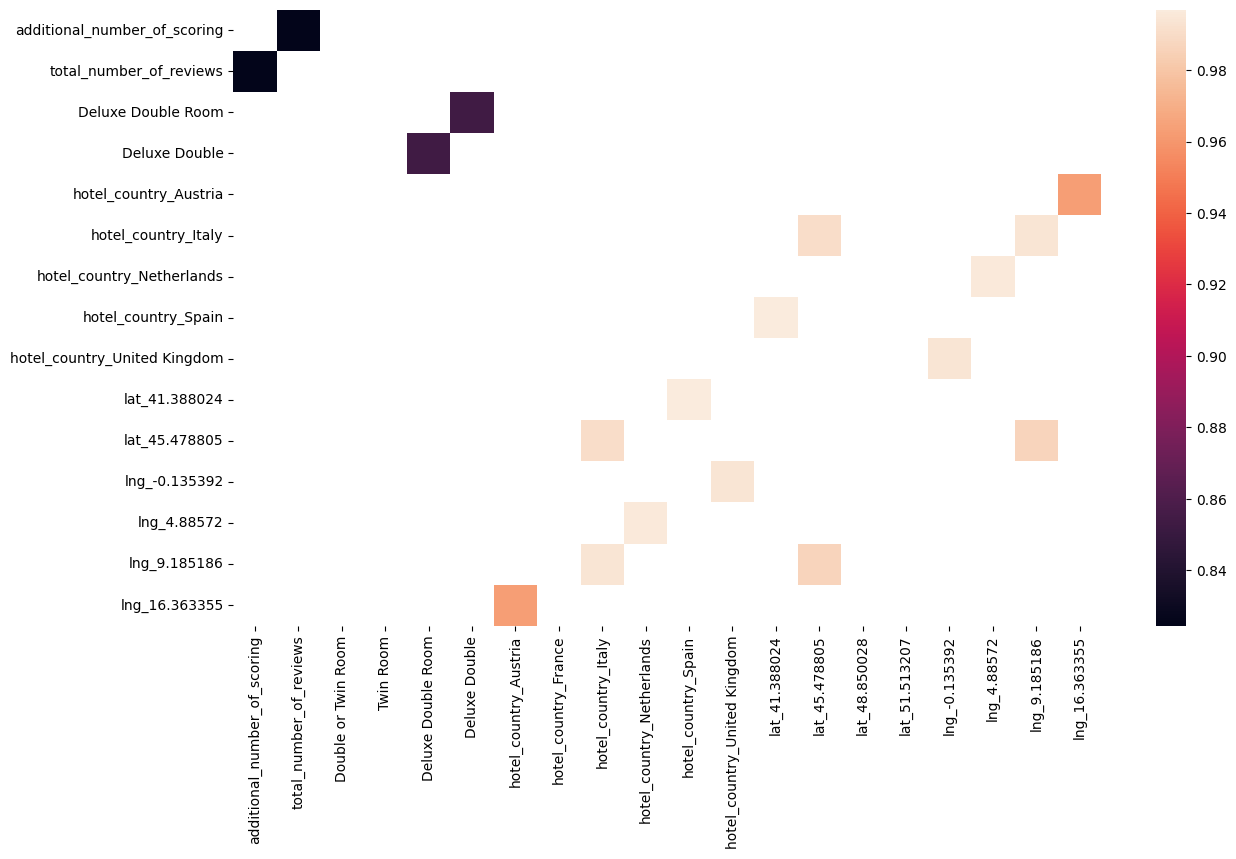

In [97]:
mask = df.corr().replace(1, 0)
mask = mask[mask > 0.75].dropna(axis=1, how='all')
fig, ax = plt.subplots(ncols=1, figsize=(14, 8))
sns.heatmap(mask[mask > 0.80].dropna(axis=0, how='all'));

C:\Users\User\AppData\Local\Temp\ipykernel_2332\1542719553.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = df.corr().replace(1, 0)


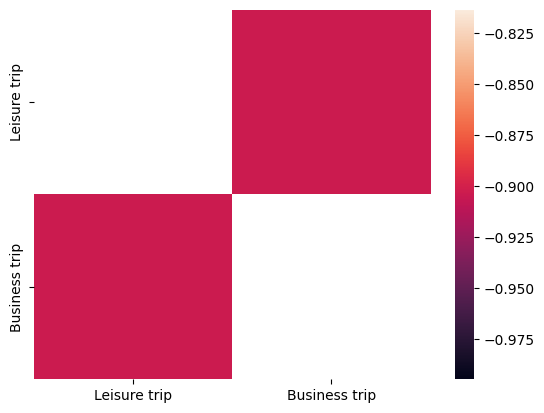

In [98]:
mask = df.corr().replace(1, 0)
mask[mask < -0.80]
mask = mask[mask < -0.80].dropna(axis=1, how='all')
mask[mask < -0.80].dropna(axis=0, how='all')
sns.heatmap(mask[mask < -0.80].dropna(axis=0, how='all'));

In [99]:
df = df.drop(labels='review_date', axis=1)
df = df.drop(labels='review_year_2017', axis=1)
df = df.drop(labels='additional_number_of_scoring', axis=1)
df = df.drop(labels='hotel_name', axis=1)
df = df.drop(labels='hotel_address', axis=1)

df = df.drop(df.select_dtypes('object').columns, axis=1)
df = df.drop(df.select_dtypes('category').columns, axis=1)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 148 entries, average_score to lng_16.363355
dtypes: float64(2), int64(107), uint8(39)
memory usage: 336.1 MB


In [101]:
from sklearn.model_selection import train_test_split 

X = df.drop(['reviewer_score'], axis = 1)  
y = df['reviewer_score'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [102]:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [103]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12854321078132108


* 0.13594403105290237
* 0.13597656581455947 (-Double or Twin Room) (-Deluxe Double)
* 0.135852647500079
* 0.1285475000129991
* 0.1286961477836741
* 0.12861883748286407 (lat and lng categorical)
* 0.1286032128320532
* 0.12854321078132108